## Selección de características en aprendizaje supervisado

### Selección de características usando la varianza como criterio

A mayor varianza mayor información.

Características con baja varianza no aportan información significativa para discriminar las clases.

Documetación de la función VarianceThreshold https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

**Conjunto de datos (diagnóstico) de cáncer de mama**

In [1]:
import pandas as pd 
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [2]:
path = "https://gitlab.com/luisvasv/public/-/raw/master/datasets/001.analitica.predictiva/001.cancer.csv.txt"
dataset = pd.read_csv(path, sep = ',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [3]:
dataset.head(10)

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0          0        17.99  ...          0.4601                  0.11890
1          0        20.57  ...          0.2750                  0.08902
2          0        19.69  ...          0.3613                  0.08758
3          0        11.42  ...          0.6638                  0.17300
4          0        20.29  ...          0.2364                  0.07678
5          0        12.45  ...          0.3985                  0.12440
6          0        18.25  ...          0.3063                  0.08368
7          0        13.71  ...          0.3196                  0.11510
8          0        13.00  ...          0.4378                  0.10720
9          0        12.46  ...          0.4366                  0.20750

[10 rows x 31 columns]

In [4]:
y_target= dataset['diagnosis']
X_predictors = dataset.drop(columns=['diagnosis'])

In [5]:
corr = dataset.corr()
corr

diagnosis  ...  fractal_dimension_worst
diagnosis                 1.000000  ...                -0.323872
radius_mean              -0.730029  ...                 0.007066
texture_mean             -0.415185  ...                 0.119205
perimeter_mean           -0.742636  ...                 0.051019
area_mean                -0.708984  ...                 0.003738
smoothness_mean          -0.358560  ...                 0.499316
compactness_mean         -0.596534  ...                 0.687382
concavity_mean           -0.696360  ...                 0.514930
concave points_mean      -0.776614  ...                 0.368661
symmetry_mean            -0.330499  ...                 0.438413
fractal_dimension_mean    0.012838  ...                 0.767297
radius_se                -0.567134  ...                 0.049559
texture_se                0.008303  ...                -0.045655
perimeter_se             -0.556141  ...                 0.085433
area_se                  -0.548236  ...                 0.017539
smoothness_se             0.067016  ...                 0.101480
compactness_se           -0.292999  ...                 0.590973
concavity_se             -0.253730  ...                 0.439329
concave points_se        -0.408042  ...                 0.310655
symmetry_se               0.006522  ...                 0.078079
fractal_dimension_se     -0.077972  ...                 0.591328
radius_worst             -0.776454  ...                 0.093492
texture_worst            -0.456903  ...                 0.219122
perimeter_worst          -0.782914  ...                 0.138957
area_worst               -0.733825  ...                 0.079647
smoothness_worst         -0.421465  ...                 0.617624
compactness_worst        -0.590998  ...                 0.810455
concavity_worst          -0.659610  ...                 0.686511
concave points_worst     -0.793566  ...                 0.511114
symmetry_worst           -0.416294  ...                 0.537848
fractal_dimension_worst  -0.323872  ...                 1.000000

[31 rows x 31 columns]

In [7]:
#sns.heatmap(corr, annot = True)
#plt.show()
#la cantidad de variables no permite una interpretación del gráfico, más adelante seleccionando las mejores variables lo veremos 

In [ ]:
X_predictors.var()

radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst                 324167.385102
smoothness_worst

Estableciento un umbral de 0.1 de varianza para conservar la característica, tenemos:

In [8]:
varianceThreshold = VarianceThreshold(threshold=0.1)

fit_var = varianceThreshold.fit_transform(X_predictors)


In [10]:
feactures = X_predictors.columns.values
feactures_fit = feactures[varianceThreshold.get_support()]   #características seleccionadas
feactures_fit

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'texture_se', 'perimeter_se', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst'], dtype=object)

In [11]:
df_new = pd.DataFrame(fit_var, columns= list(feactures_fit))
df_new

radius_mean  texture_mean  ...  perimeter_worst  area_worst
0          17.99         10.38  ...           184.60      2019.0
1          20.57         17.77  ...           158.80      1956.0
2          19.69         21.25  ...           152.50      1709.0
3          11.42         20.38  ...            98.87       567.7
4          20.29         14.34  ...           152.20      1575.0
..           ...           ...  ...              ...         ...
564        21.56         22.39  ...           166.10      2027.0
565        20.13         28.25  ...           155.00      1731.0
566        16.60         28.08  ...           126.70      1124.0
567        20.60         29.33  ...           184.60      1821.0
568         7.76         24.54  ...            59.16       268.6

[569 rows x 11 columns]

In [14]:
corr = df_new.corr()
corr
#sns.heatmap(corr, annot = True)
#plt.show()

radius_mean  texture_mean  ...  perimeter_worst  area_worst
radius_mean         1.000000      0.323782  ...         0.965137    0.941082
texture_mean        0.323782      1.000000  ...         0.358040    0.343546
perimeter_mean      0.997855      0.329533  ...         0.970387    0.941550
area_mean           0.987357      0.321086  ...         0.959120    0.959213
texture_se         -0.097317      0.386358  ...        -0.102242   -0.083195
perimeter_se        0.674172      0.281673  ...         0.721031    0.730713
area_se             0.735864      0.259845  ...         0.761213    0.811408
radius_worst        0.969539      0.352573  ...         0.993708    0.984015
texture_worst       0.297008      0.912045  ...         0.365098    0.345842
perimeter_worst     0.965137      0.358040  ...         1.000000    0.977578
area_worst          0.941082      0.343546  ...         0.977578    1.000000

[11 rows x 11 columns]

### Selección de características usando información mutua como criterio

En teoría de la probabilidad, la información mutua o transinformación o ganancia de información de dos variables aleatorias es una cantidad que mide la dependencia estadística entre ambas variables. Más precisamente, mide la información o reducción de la incertidumbre (entropía) de una variable aleatoria, $X$, debido al conocimiento del valor de otra variable aleatoria $Y$.
Se puede usar para medir la relevancia entre variables para modelos de clasificación y regresión: 

$I(X,Y) = \sum_{x} \sum_{y} P(X,Y) log \left(\frac{P(X,Y)}{P(X)P(Y)}\right)$

Cuando dos variables aleatorias son independientes su probabilidad cojunta es igual al producto de la probabilidad de cada una. Esto ocasiona que la información mutua sea igual a cero. 

Documentación de la función mutual_info_classif https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif 



In [15]:
mutual_info = mutual_info_classif(
    # -------------------------------------------------------------------------
    # Feature matrix.
    X=X_predictors,
    # -------------------------------------------------------------------------
    # Target vector.
    y=y_target,
    # -------------------------------------------------------------------------
    # Number of neighbors to use for MI estimation for continuous variables.
    n_neighbors=3,
    # -------------------------------------------------------------------------
    # If bool, then determines whether to consider all features discrete or
    # continuous.
    discrete_features="auto",
    # -------------------------------------------------------------------------
    # Determines random number generation for adding small noise to continuous
    # variables in order to remove repeated values.
    random_state=None,
)
feactures = pd.DataFrame(feactures, columns=["feactures"])
mutual_info = pd.DataFrame( mutual_info, columns=["mutual_info"])
mutual_info1 = pd.concat([feactures, mutual_info], axis=1)
mutual_info1.sort_values(by= ["mutual_info"], ascending= False).reset_index()


index                feactures  mutual_info
0      22          perimeter_worst     0.478692
1      23               area_worst     0.464925
2      20             radius_worst     0.452863
3       7      concave points_mean     0.440201
4      27     concave points_worst     0.437847
5       2           perimeter_mean     0.404169
6       6           concavity_mean     0.373305
7       0              radius_mean     0.364540
8       3                area_mean     0.356780
9      13                  area_se     0.340182
10     26          concavity_worst     0.317215
11     12             perimeter_se     0.278064
12     10                radius_se     0.248785
13     25        compactness_worst     0.225137
14      5         compactness_mean     0.213022
15     17        concave points_se     0.124894
16     21            texture_worst     0.122876
17     16             concavity_se     0.116697
18      1             texture_mean     0.096493
19     28           symmetry_worst     0.093557
20     24         smoothness_worst     0.092795
21      4          smoothness_mean     0.084790
22     15           compactness_se     0.073425
23     29  fractal_dimension_worst     0.069349
24      8            symmetry_mean     0.061293
25     19     fractal_dimension_se     0.042251
26     14            smoothness_se     0.014114
27     18              symmetry_se     0.013544
28      9   fractal_dimension_mean     0.007870
29     11               texture_se     0.000000

Devuelve el valor de la información mutua entre la Y con cada una de las X. 

### Selección de características usando el score como criterio

Esta es una metodología que permite realizar la selección independiente de cada característica, mediante una medición directa de la relación entre cada característica y. Es decir no se tienen en cuenta las interacciones entre las variables predictoras. 

Documentación de la función SelectBest https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html




In [16]:
selectKBest = SelectKBest(
    score_func= mutual_info_classif,
    # -------------------------------------------------------------------------
    # Number of top features to select. int or 'all'
    k= 10
)


In [17]:
selectKBest.fit(X_predictors, y_target)


SelectKBest(score_func=<function mutual_info_classif at 0x7f54896e9b90>)

In [19]:
X_new = selectKBest.transform(X_predictors)
X_new

array([[1.799e+01, 1.228e+02, 1.001e+03, ..., 1.846e+02, 2.019e+03,
        2.654e-01],
       [2.057e+01, 1.329e+02, 1.326e+03, ..., 1.588e+02, 1.956e+03,
        1.860e-01],
       [1.969e+01, 1.300e+02, 1.203e+03, ..., 1.525e+02, 1.709e+03,
        2.430e-01],
       ...,
       [1.660e+01, 1.083e+02, 8.581e+02, ..., 1.267e+02, 1.124e+03,
        1.418e-01],
       [2.060e+01, 1.401e+02, 1.265e+03, ..., 1.846e+02, 1.821e+03,
        2.650e-01],
       [7.760e+00, 4.792e+01, 1.810e+02, ..., 5.916e+01, 2.686e+02,
        0.000e+00]])

In [21]:
feactures = X_predictors.columns.values
feactures_mi = feactures[selectKBest.get_support()]   #características seleccionadas
feactures_mi


array(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concave points_worst'],
      dtype=object)

In [22]:
df_new1 = pd.DataFrame(X_new, columns= list(feactures_mi))
df_new1

radius_mean  perimeter_mean  ...  area_worst  concave points_worst
0          17.99          122.80  ...      2019.0                0.2654
1          20.57          132.90  ...      1956.0                0.1860
2          19.69          130.00  ...      1709.0                0.2430
3          11.42           77.58  ...       567.7                0.2575
4          20.29          135.10  ...      1575.0                0.1625
..           ...             ...  ...         ...                   ...
564        21.56          142.00  ...      2027.0                0.2216
565        20.13          131.20  ...      1731.0                0.1628
566        16.60          108.30  ...      1124.0                0.1418
567        20.60          140.10  ...      1821.0                0.2650
568         7.76           47.92  ...       268.6                0.0000

[569 rows x 10 columns]

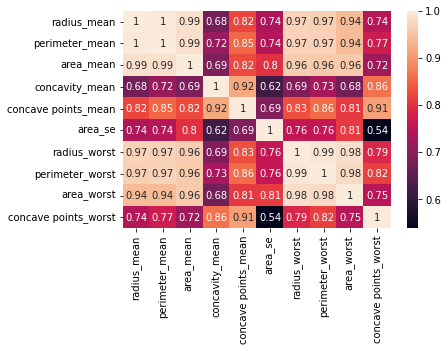

In [23]:
corr = df_new1.corr()
sns.heatmap(corr, annot = True)
plt.show()

### Eliminación recursiva de características 

En esta metodología se usa un estimador que asigna pesos a las características, por ejemplo, los pesos en un modelo de regresión lineal.

1. Se inicia con un conjunto que contiene todas las características.

2. Se estima un modelo y se hace un ranking de las características.

3. Se elimina la menos importante.

4. Se repite el proceso hasta que se alcance el número de características deseado.


Documentación de la función RFE https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html


In [28]:

estimator = RandomForestRegressor()

selector = RFE(
    # -------------------------------------------------------------------------
    # Debe ser un método de aprendizaje automático que proporcione información 
    # de la importancia de las variables
    estimator=estimator,
    # -------------------------------------------------------------------------
    # Número de caracteristicas a seleccionar
    n_features_to_select=10,
    # -------------------------------------------------------------------------
    # Caracteristicas removidas en cada iteración
    step=1,
    # -------------------------------------------------------------------------
    verbose=0
)

selector = selector.fit(X_predictors, y_target)


**Características con los scores más altos**

In [29]:
feactures = pd.DataFrame(X_predictors.columns.values, columns= ["feactures"])
ranking = pd.DataFrame(selector.ranking_, columns= ["ranking"])
ranking1= pd.concat([feactures,ranking ], axis =1)
ranking1.sort_values(by= ["ranking"]).reset_index()

index                feactures  ranking
0      22          perimeter_worst        1
1       1             texture_mean        1
2      27     concave points_worst        1
3      26          concavity_worst        1
4      24         smoothness_worst        1
5       7      concave points_mean        1
6      23               area_worst        1
7      20             radius_worst        1
8      21            texture_worst        1
9      13                  area_se        1
10      3                area_mean        2
11     17        concave points_se        3
12     28           symmetry_worst        4
13     29  fractal_dimension_worst        5
14      6           concavity_mean        6
15     19     fractal_dimension_se        7
16     11               texture_se        8
17     10                radius_se        9
18     16             concavity_se       10
19     12             perimeter_se       11
20     14            smoothness_se       12
21      4          smoothness_mean       13
22     18              symmetry_se       14
23     15           compactness_se       15
24      0              radius_mean       16
25     25        compactness_worst       17
26      9   fractal_dimension_mean       18
27      2           perimeter_mean       19
28      5         compactness_mean       20
29      8            symmetry_mean       21

**Características seleccionadas**

In [30]:
feactures = X_predictors.columns.values
feactures_rfe = feactures[selector.support_]   #características seleccionadas
feactures_rfe

array(['texture_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'concavity_worst', 'concave points_worst'],
      dtype=object)

In [32]:
selector.transform(X_predictors)
df_new2 = pd.DataFrame(selector.transform(X_predictors), columns= list(feactures_rfe))
df_new2

texture_mean  concave points_mean  ...  concavity_worst  concave points_worst
0           10.38              0.14710  ...           0.7119                0.2654
1           17.77              0.07017  ...           0.2416                0.1860
2           21.25              0.12790  ...           0.4504                0.2430
3           20.38              0.10520  ...           0.6869                0.2575
4           14.34              0.10430  ...           0.4000                0.1625
..            ...                  ...  ...              ...                   ...
564         22.39              0.13890  ...           0.4107                0.2216
565         28.25              0.09791  ...           0.3215                0.1628
566         28.08              0.05302  ...           0.3403                0.1418
567         29.33              0.15200  ...           0.9387                0.2650
568         24.54              0.00000  ...           0.0000                0.0000

[569 rows x 10 columns]

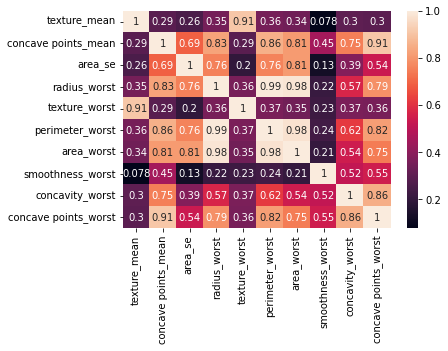

In [33]:
corr= df_new2.corr()
sns.heatmap(corr, annot = True)
plt.show()